#Big Data y Spark: ingeniería de datos con Python y pyspark
-Curso de Udemy - https://www.udemy.com/course/big-data-y-spark-ingenieria-de-datos-con-python-y-pyspark

# Descargando y instalando Spark en Colab

In [1]:
# Instalar SDK Java 8

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Descargar Spark 3.4.3

!wget -q https://archive.apache.org/dist/spark/spark-3.4.3/spark-3.4.3-bin-hadoop3.tgz

# Descomprimir el archivo descargado de Spark

!tar xf spark-3.4.3-bin-hadoop3.tgz

# Establecer las variables de entorno

import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.3-bin-hadoop3"

# Instalar la librería findspark

!pip install -q findspark

# Instalar pyspark

!pip install -q pyspark

### verificar la instalación ###

import findspark

findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

# Probando la sesión de Spark
df = spark.createDataFrame([{"Hola": "Mundo"} for x in range(10)])

df.show(10, False)

from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, DateType
from pyspark.sql.functions import col,desc

+-----+
|Hola |
+-----+
|Mundo|
|Mundo|
|Mundo|
|Mundo|
|Mundo|
|Mundo|
|Mundo|
|Mundo|
|Mundo|
|Mundo|
+-----+



# Introducción a los RDD en Spark

In [ ]:
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('Curso Pyspark').getOrCreate()

In [ ]:
sc = spark.sparkContext

In [ ]:
#Crear un RDD vacio

rdd_vacio = sc.emptyRDD

In [ ]:
#Crear un RDD con parallelize

rdd_vacio3 = sc.parallelize([], 3)
rdd_vacio3.getNumPartitions()

3

In [ ]:
rdd = sc.parallelize([1,2,3,4,5])

In [ ]:
rdd

ParallelCollectionRDD[10] at readRDDFromFile at PythonRDD.scala:287

In [ ]:
rdd.collect()

[1, 2, 3, 4, 5]

In [ ]:
# Crear un RDD desde un archivo de texto

rdd_texto = sc.textFile('./Date/rdd_source.txt')


In [ ]:
import os
print(os.getcwd())  # Print the current working directory

/content


In [ ]:
rdd_texto.collect()

['Así podemos crear', 'un RDD desde un', 'archivo de texto!!!']

In [ ]:
rdd_texto_completo = sc.wholeTextFiles('./Date/rdd_source.txt')
rdd_texto_completo.collect()

[('file:/content/rdd_source.txt',
  'Así podemos crear\nun RDD desde un\narchivo de texto!!!')]

In [ ]:
rdd_suma = rdd.map(lambda x: x+2)
rdd_suma.collect()

[3, 4, 5, 6, 7]

In [ ]:
df = spark.createDataFrame([(1, 'jose'), (2, 'juan')], ['id', 'nombre'])
df.show()

+---+------+
| id|nombre|
+---+------+
|  1|  jose|
|  2|  juan|
+---+------+



In [ ]:
rdd_df = df.rdd
rdd_df.collect()

[Row(id=1, nombre='jose'), Row(id=2, nombre='juan')]

# Ejerjicios Sección 3

In [ ]:
spark1 = SparkSession.builder.master("local[*]").appName('Cap2').getOrCreate()

In [ ]:
spark1

In [ ]:
sc = spark.sparkContext

In [ ]:
rdd_vacio = sc.emptyRDD
rdd_vacio

<bound method SparkContext.emptyRDD of <SparkContext master=local[*] appName=pyspark-shell>>

In [ ]:
rdd_parallelize = sc.parallelize([], 5)
rdd_parallelize.getNumPartitions()

5

In [ ]:
rdd_primos = sc.parallelize([2,3,5,7,11,13,17,19])
rdd_primos.collect()

[2, 3, 5, 7, 11, 13, 17, 19]

In [ ]:
rdd_primos.filter(lambda x: x>10).collect()

[11, 13, 17, 19]

In [ ]:
rdd_texto = sc.wholeTextFiles('./Date/el_valor_del_big_data.txt')
rdd_texto.collect()

[('file:/content/el_valor_del_big_data.txt',
  'El valor y la realidad de big data\r\nEn los últimos años, han surgido otras "dos V": valor y veracidad. Los datos poseen un valor intrínseco. Sin embargo, no tienen ninguna utilidad hasta que dicho valor se descubre. Resulta igualmente importante: ¿cuál es la veracidad de sus datos y cuánto puede confiar en ellos?\r\n\r\nHoy en día, el big data se ha convertido en un activo crucial. Piense en algunas de las mayores empresas tecnológicas del mundo. Gran parte del valor que ofrecen procede de sus datos, que analizan constantemente para generar una mayor eficiencia y desarrollar nuevos productos.\r\n\r\nAvances tecnológicos recientes han reducido exponencialmente el coste del almacenamiento y la computación de datos, haciendo que almacenar datos resulte más fácil y barato que nunca. Actualmente, con un mayor volumen de big data más barato y accesible, puede tomar decisiones empresariales más acertadas y precisas.\r\n\r\nIdentificar el valor

In [ ]:
rdd_texto1 = sc.textFile('./Date/el_valor_del_big_data.txt')
rdd_texto1.collect()

['El valor y la realidad de big data',
 'En los últimos años, han surgido otras "dos V": valor y veracidad. Los datos poseen un valor intrínseco. Sin embargo, no tienen ninguna utilidad hasta que dicho valor se descubre. Resulta igualmente importante: ¿cuál es la veracidad de sus datos y cuánto puede confiar en ellos?',
 '',
 'Hoy en día, el big data se ha convertido en un activo crucial. Piense en algunas de las mayores empresas tecnológicas del mundo. Gran parte del valor que ofrecen procede de sus datos, que analizan constantemente para generar una mayor eficiencia y desarrollar nuevos productos.',
 '',
 'Avances tecnológicos recientes han reducido exponencialmente el coste del almacenamiento y la computación de datos, haciendo que almacenar datos resulte más fácil y barato que nunca. Actualmente, con un mayor volumen de big data más barato y accesible, puede tomar decisiones empresariales más acertadas y precisas.',
 '',
 'Identificar el valor del big data no pasa solo por analizar

In [ ]:
sc = spark.sparkContext

In [ ]:
rdd = sc.parallelize([1,2,3,4,5])
rdd.collect()


[1, 2, 3, 4, 5]

In [ ]:
rdd_resta = rdd.map(lambda x: x-1)
rdd_resta.collect()

[0, 1, 2, 3, 4]

In [ ]:
rdd_par = rdd.map(lambda x: x%2 == 0)
rdd_par.collect()

[False, True, False, True, False]

In [ ]:
rdd_texto = sc.parallelize(['jose', 'lucia', 'juan', 'pedro'])
rdd_texto.collect()
rdd_hola = rdd_texto.map(lambda x: 'Hola ' + x)
rdd_hola.collect()

['Hola jose', 'Hola lucia', 'Hola juan', 'Hola pedro']

In [ ]:
rdd = sc.parallelize([1,2,3,4,5])
rdd.collect()

[1, 2, 3, 4, 5]

In [ ]:
rdd_cuadrado = rdd.map(lambda x: (x, x ** 2))
rdd_cuadrado.collect()

[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]

In [ ]:
rdd_cuadrado_flat = rdd.flatMap(lambda x: (x, x**2))
rdd_cuadrado_flat.collect()

[1, 1, 2, 4, 3, 9, 4, 16, 5, 25]

In [ ]:
# prompt: create rdd 1-10

from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.master("local[*]").appName('CreateRDD').getOrCreate()
sc = spark.sparkContext

# Create an RDD with numbers 1 to 10
rdd = sc.parallelize(range(1, 11))

# Display the RDD elements
print(rdd.collect())



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
rdd = rdd.filter(lambda x: x%2 ==0)
rdd.collect()

[2, 4, 6, 8, 10]

In [ ]:
rdd = sc.parallelize(range(1, 11), 20)

In [ ]:
rdd.getNumPartitions()

20

In [ ]:
rdd.coalesce(4).getNumPartitions()

4

In [ ]:
rdd = sc.parallelize([
    ('casa', 2),
    ('parque', 5),
    ('escuela', 3),
    ('hospital', 1),
    ('biblioteca', 4),
    ('cine', 6),
    ('restaurante', 7),
    ('tienda', 8),
    ('aeropuerto', 9),
    ('hotel', 10),
    ('restaurante', 3)
])
rdd.collect()

[('casa', 2),
 ('parque', 5),
 ('escuela', 3),
 ('hospital', 1),
 ('biblioteca', 4),
 ('cine', 6),
 ('restaurante', 7),
 ('tienda', 8),
 ('aeropuerto', 9),
 ('hotel', 10),
 ('restaurante', 3)]

In [ ]:
rdd_reducido = rdd.reduceByKey(lambda x,y: x + y)
rdd_reducido.collect()

[('casa', 2),
 ('parque', 5),
 ('tienda', 8),
 ('aeropuerto', 9),
 ('hotel', 10),
 ('escuela', 3),
 ('hospital', 1),
 ('biblioteca', 4),
 ('cine', 6),
 ('restaurante', 10)]

#Ejerjicios Seccion 4

In [ ]:
rdd_languajes = sc.parallelize([
    'Python', 'R', 'C', 'Scala', 'Rugby', 'SQL'
])
rdd_languajes.collect()

['Python', 'R', 'C', 'Scala', 'Rugby', 'SQL']

In [ ]:
rdd_max = rdd_languajes.map(lambda x: x.upper())
rdd_max.collect()

['PYTHON', 'R', 'C', 'SCALA', 'RUGBY', 'SQL']

In [ ]:
rdd1 = sc.parallelize([item for item in range (10)])
rdd1.collect()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
rdd1 = sc.parallelize([(item, item**2) for item in range(20)])

In [ ]:
rdd1.collect()

[(0, 0),
 (1, 1),
 (2, 4),
 (3, 9),
 (4, 16),
 (5, 25),
 (6, 36),
 (7, 49),
 (8, 64),
 (9, 81),
 (10, 100),
 (11, 121),
 (12, 144),
 (13, 169),
 (14, 196),
 (15, 225),
 (16, 256),
 (17, 289),
 (18, 324),
 (19, 361)]

In [ ]:
import findspark
findspar.init()

ModuleNotFoundError: No module named 'findspark'

#Ejerjicion Sección 6


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Aprender").getOrCreate()
sc = spark.sparkContext

In [ ]:
rdd = sc.parallelize([item for item in range(10)]).map(lambda x: (x, x ** 2))
rdd.collect()

[(0, 0),
 (1, 1),
 (2, 4),
 (3, 9),
 (4, 16),
 (5, 25),
 (6, 36),
 (7, 49),
 (8, 64),
 (9, 81)]

In [ ]:
df = rdd.toDF(['numero', 'cuadrado'])
df.show()

+------+--------+
|numero|cuadrado|
+------+--------+
|     0|       0|
|     1|       1|
|     2|       4|
|     3|       9|
|     4|      16|
|     5|      25|
|     6|      36|
|     7|      49|
|     8|      64|
|     9|      81|
+------+--------+



In [ ]:
df.printSchema()

root
 |-- numero: long (nullable = true)
 |-- cuadrado: long (nullable = true)



In [ ]:
rdd1 = sc.parallelize([(1, 'Jose', 45.5), (2, 'Teresa', 54.3), (3, 'Katia', 12.7)])

In [ ]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, DateType

In [ ]:
esquema1 = StructType(
    [
     StructField ('id', IntegerType(), True),
     StructField ('nombre', StringType(), True),
     StructField('sueldo', DoubleType(), True)
     ]
)

In [ ]:
esquema2 = "id INT, nombre STRING, sueldo DOUBLE"

In [ ]:
df1 = spark.createDataFrame(rdd1, schema=esquema2)
df1.show()
df1.printSchema()

+---+------+------+
| id|nombre|sueldo|
+---+------+------+
|  1|  Jose|  45.5|
|  2|Teresa|  54.3|
|  3| Katia|  12.7|
+---+------+------+

root
 |-- id: integer (nullable = true)
 |-- nombre: string (nullable = true)
 |-- sueldo: double (nullable = true)



In [ ]:
df = spark.read.text('./Date/dataTXT.txt')

In [ ]:
df.show(truncate=False)

+-----------------------------------------------------------------------+
|value                                                                  |
+-----------------------------------------------------------------------+
|Estamos en el curso de pyspark                                         |
|En este capítulo estamos estudiando el API SQL de Saprk                |
|En esta sección estamos creado dataframes a partir de fuentes de datos,|
|y en este ejemplo creamos un dataframe a partir de un texto plano      |
+-----------------------------------------------------------------------+



In [ ]:
df = spark.read.csv('./Date/dataCSV.csv')
df.show()

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/content/spark-3.4.3-bin-hadoop3/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/spark-3.4.3-bin-hadoop3/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
                          ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/socket.py", line 718, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
df1 = spark.read.option('header', 'true').csv('./Date/dataCSV.csv')
df1.show()

In [ ]:
df2 = spark.read.option('header', 'true').option('delimiter', '!').csv('./Date/dataTab.txt')
df2.show()

In [ ]:
json_schema = StructType(
    [
        StructField('color', StringType(), True),
        StructField('edad', IntegerType(), True),
        StructField('fecha', DateType(), True),
        StructField('pais', StringType(), True)
    ]
)

In [ ]:
df4 = spark.read.schema(json_schema).json('./Date/dataJSON.json')
df4.show()
df4.printSchema()

In [ ]:
df5= spark.read.parquet('./Date/dataPARQUET.parquet')
df5.show()

In [ ]:
df6 = spark.read.format('parquet').load('./Date/dataPARQUET.parquet')
df6.show()

In [ ]:
df7 = spark.read.parquet('./Date/dataPARQUET.parquet')
df7.show()
df7.printSchema()

In [ ]:
df7.select('title', 'tags').show()

In [ ]:
from pyspark.sql.functions import col

df7.select(col('title'), col('tags')).show()

In [ ]:
from pyspark.sql.functions import col

df8 = spark.read.parquet('./Date/dataPARQUET.parquet')
df8.show(1)


In [ ]:
df8.select('video_id', 'trending_date').show()

In [ ]:
df8.select(
    'likes',
    'dislikes',
    ('likes' - 'dislikes').alias('difference')
)

In [ ]:
df8.select(
    col('likes'),
    col('dislikes'),
   (col('likes') - col('dislikes')).alias('difference')
).show()

In [ ]:
df8.selectExpr('likes', 'dislikes', '(likes - dislikes) as difference').show()

In [ ]:
df8.selectExpr("count(distinct(video_id)) as videos").show()

In [ ]:
df8.filter(col('video_id')=='2kyS6SvSYSE').show()

In [ ]:
df9 = spark.read.parquet('./Date/dataPARQUET.parquet').where(col('video_id')=='2kyS6SvSYSE')
df9.show()

In [ ]:
df9.select('trending_date', 'likes').filter((col('trending_date') != '17.14.11') & (col('likes') > 7000)).show(truncate=False)

In [ ]:
df9.filter(col('trending_date') != '17.14.11').filter(col('likes') > 7000).show()

In [ ]:
df9_sin_duplicados = df9.dropDuplicates()
df9_sin_duplicados.show()

In [ ]:
df9.dropDuplicates(['video_id']).show()

In [ ]:
df =  (spark.read.parquet('./Date/dataPARQUET.parquet')
        .select(col('likes'), col('views'), col('video_id'), col('dislikes'))
        .dropDuplicates(['video_id'])
        )
df.show()




In [ ]:
from pyspark.sql.functions import desc

df.where(col('likes') != 'null').sort('likes')

df.sort(desc('likes'))

df.orderBy(col('views').desc()).show()

In [ ]:
# funcion limit

top_10 = df.orderBy(col('views').desc()).limit(10)
top_10.show()

In [ ]:
#withcolumn



df1 = df.withColumn('valoracion', col('likes') - col('dislikes'))
df1.show()

In [ ]:
df1 = (df.withColumn('valoracion', col('likes') - col('dislikes'))
         .withColumn('porcentaje_likes', (col('likes') / (col('likes') + col('dislikes'))) * 100)
       )
df1.orderBy('porcentaje_likes').where((col('likes')!='null') & (col('porcentaje_likes')!= 'null')).show()


#Ejerjicios Seccion 7

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Ejerjicios7").getOrCreate()

sc = spark.sparkContext

In [ ]:
df1 = spark.read.csv('./Date/Case.csv', header=True)

##FUNCIONES

In [ ]:
from pyspark.sql.functions import col,sum,countDistinct

In [ ]:
df.show()

AttributeError: 'NoneType' object has no attribute 'show'

In [ ]:
from pyspark.sql.functions import col,sum
df1 = df1.select('province', 'city', 'confirmed')
df1.printSchema()

root
 |-- province: string (nullable = true)
 |-- city: string (nullable = true)
 |-- confirmed: double (nullable = true)



In [ ]:
df1.show()

+--------+---------------+---------+
|province|           city|confirmed|
+--------+---------------+---------+
|   Seoul|     Yongsan-gu|      139|
|   Seoul|      Gwanak-gu|      119|
|   Seoul|        Guro-gu|       95|
|   Seoul|   Yangcheon-gu|       43|
|   Seoul|      Dobong-gu|       43|
|   Seoul|        Guro-gu|       41|
|   Seoul|from other city|       36|
|   Seoul|  Dongdaemun-gu|       17|
|   Seoul|from other city|       25|
|   Seoul|      Gwanak-gu|       30|
|   Seoul|   Eunpyeong-gu|       14|
|   Seoul|   Seongdong-gu|       13|
|   Seoul|      Jongno-gu|       10|
|   Seoul|     Gangnam-gu|        7|
|   Seoul|        Jung-gu|        7|
|   Seoul|   Seodaemun-gu|        5|
|   Seoul|      Jongno-gu|        7|
|   Seoul|     Gangnam-gu|        6|
|   Seoul|from other city|        1|
|   Seoul|   Geumcheon-gu|        6|
+--------+---------------+---------+
only showing top 20 rows



In [ ]:
df1 = df1.withColumn('confirmed', col('confirmed').cast('double'))
df1.printSchema()
df1.orderBy('confirmed').show()

root
 |-- province: string (nullable = true)
 |-- city: string (nullable = true)
 |-- confirmed: double (nullable = true)

+------------+---------------+---------+
|    province|           city|confirmed|
+------------+---------------+---------+
|       Seoul|     Gangseo-gu|      0.0|
|  Gangwon-do|              -|      0.0|
|     Jeju-do|              -|      0.0|
|       Busan|from other city|      1.0|
|       Seoul|     Gangnam-gu|      1.0|
|       Seoul|from other city|      1.0|
|       Seoul|from other city|      1.0|
|       Seoul|              -|      1.0|
|      Sejong|              -|      1.0|
|     Gwangju|              -|      1.0|
|      Sejong|from other city|      1.0|
|Jeollabuk-do|from other city|      1.0|
|Jeollanam-do|from other city|      1.0|
|     Jeju-do|from other city|      1.0|
|       Daegu|from other city|      2.0|
|       Daegu|from other city|      2.0|
|     Incheon|from other city|      2.0|
|     Daejeon|from other city|      2.0|
|     Daejeon|fr

In [ ]:
df1 = df1.groupBy('province', 'city').agg(sum(col('confirmed')).alias('total_confirmed'))

In [ ]:
df1.orderBy(desc('total_confirmed')).where(col('city')!='-').where(col('city')!='from other city').show(3)

+--------+------------+---------------+
|province|        city|total_confirmed|
+--------+------------+---------------+
|   Daegu|      Nam-gu|         4511.0|
|   Daegu|Dalseong-gun|          297.0|
|   Seoul|   Gwanak-gu|          149.0|
+--------+------------+---------------+
only showing top 3 rows



In [ ]:
df2 = spark.read.csv('PatientInfo.csv', header=True)
countBefore = df2.select(countDistinct('patient_id')).collect()
print(countBefore)

df2 = df2.dropDuplicates(['patient_id'])
countAfter = df2.select(countDistinct('patient_id')).collect()
print(countAfter)

df3 = df2.where("infected_by IS NOT NULL")
count = df3.select(countDistinct('patient_id')).collect()
print(count)

df3.where("sex = 'female'").filter((col('sex').isNotNull())).drop('released_date', 'deceased_date').show()

[Row(count(DISTINCT patient_id)=5164)]
[Row(count(DISTINCT patient_id)=5164)]
[Row(count(DISTINCT patient_id)=1346)]
+----------+------+---+-------+--------+-------------+--------------------+-----------+--------------+------------------+--------------+--------+
|patient_id|   sex|age|country|province|         city|      infection_case|infected_by|contact_number|symptom_onset_date|confirmed_date|   state|
+----------+------+---+-------+--------+-------------+--------------------+-----------+--------------+------------------+--------------+--------+
|1000000005|female|20s|  Korea|   Seoul|  Seongbuk-gu|contact with patient| 1000000002|             2|              null|    2020-01-31|released|
|1000000006|female|50s|  Korea|   Seoul|    Jongno-gu|contact with patient| 1000000003|            43|              null|    2020-01-31|released|
|1000000010|female|60s|  Korea|   Seoul|  Seongbuk-gu|contact with patient| 1000000003|             6|              null|    2020-02-05|released|
|100000

#Todos ejerjicios

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('Cap2').getOrCreate()
sc = spark.sparkContext

In [ ]:
rdd1 = sc.emptyRDD()
rdd1.getNumPartitions()

0

In [ ]:
rdd2 = sc.parallelize([],5)
rdd2.getNumPartitions()

5

In [ ]:
rdd3 = sc.parallelize([1,2,3,5,7,11,13,17,19])
rdd3.collect()

[1, 2, 3, 5, 7, 11, 13, 17, 19]

In [ ]:
rdd4 = rdd3.filter(lambda x: x>10)
rdd4.collect()

[11, 13, 17, 19]

In [ ]:
rdd5 = sc.wholeTextFiles('./Date/el_valor_del_big_data.txt')
rdd5.collect()

[('file:/content/el_valor_del_big_data.txt',
  'El valor y la realidad de big data\r\nEn los últimos años, han surgido otras "dos V": valor y veracidad. Los datos poseen un valor intrínseco. Sin embargo, no tienen ninguna utilidad hasta que dicho valor se descubre. Resulta igualmente importante: ¿cuál es la veracidad de sus datos y cuánto puede confiar en ellos?\r\n\r\nHoy en día, el big data se ha convertido en un activo crucial. Piense en algunas de las mayores empresas tecnológicas del mundo. Gran parte del valor que ofrecen procede de sus datos, que analizan constantemente para generar una mayor eficiencia y desarrollar nuevos productos.\r\n\r\nAvances tecnológicos recientes han reducido exponencialmente el coste del almacenamiento y la computación de datos, haciendo que almacenar datos resulte más fácil y barato que nunca. Actualmente, con un mayor volumen de big data más barato y accesible, puede tomar decisiones empresariales más acertadas y precisas.\r\n\r\nIdentificar el valor

In [ ]:
rdd6 = sc.textFile('./Date/el_valor_del_big_data.txt')
rdd6.collect()

['El valor y la realidad de big data',
 'En los últimos años, han surgido otras "dos V": valor y veracidad. Los datos poseen un valor intrínseco. Sin embargo, no tienen ninguna utilidad hasta que dicho valor se descubre. Resulta igualmente importante: ¿cuál es la veracidad de sus datos y cuánto puede confiar en ellos?',
 '',
 'Hoy en día, el big data se ha convertido en un activo crucial. Piense en algunas de las mayores empresas tecnológicas del mundo. Gran parte del valor que ofrecen procede de sus datos, que analizan constantemente para generar una mayor eficiencia y desarrollar nuevos productos.',
 '',
 'Avances tecnológicos recientes han reducido exponencialmente el coste del almacenamiento y la computación de datos, haciendo que almacenar datos resulte más fácil y barato que nunca. Actualmente, con un mayor volumen de big data más barato y accesible, puede tomar decisiones empresariales más acertadas y precisas.',
 '',
 'Identificar el valor del big data no pasa solo por analizar

In [ ]:
rdd8 = sc.parallelize(['Python', 'R', 'C', 'Scala', 'Rugby', 'SQL'])
rdd8.collect()

['Python', 'R', 'C', 'Scala', 'Rugby', 'SQL']

In [ ]:
rdd9 = rdd8.map(lambda x: x.upper())
rdd9.collect()

['PYTHON', 'R', 'C', 'SCALA', 'RUGBY', 'SQL']

In [ ]:
rdd10 = rdd9.map(lambda x: x.lower())
rdd10.collect()

['python', 'r', 'c', 'scala', 'rugby', 'sql']

In [ ]:
rdd11 = rdd10.filter(lambda x: x.startswith('r'))
rdd11.collect()

['r', 'rugby']

In [ ]:
pares = sc.parallelize([22,24,26,28])
pares.collect()

[22, 24, 26, 28]

In [ ]:
from math import sqrt
rdd11 = pares.map(lambda x: sqrt(x))
rdd11.collect()

[4.69041575982343, 4.898979485566356, 5.0990195135927845, 5.291502622129181]

In [ ]:
rdd12 = pares.map(lambda x: (x,sqrt(x)))
rdd12.collect()

[(22, 4.69041575982343),
 (24, 4.898979485566356),
 (26, 5.0990195135927845),
 (28, 5.291502622129181)]

In [ ]:
rdd11 = rdd11.repartition(20)
rdd11.collect()


[5.0990195135927845, 5.291502622129181, 4.69041575982343, 4.898979485566356]

In [ ]:
rdd11.getNumPartitions()

20

In [ ]:
rdd11 = rdd11.coalesce(5)
rdd11.collect()
#rdd11.getNumPartitions()

[5.0990195135927845, 5.291502622129181, 4.69041575982343, 4.898979485566356]

In [ ]:
rdd12 = sc.textFile('./Date/transacciones')
rdd12.collect()

['(1001, 52.3)',
 '(1005, 20.8)',
 '(1001, 10.1)',
 '(1004, 52.7)',
 '(1005, 20.7)',
 '(1002, 85.3)',
 '(1004, 20.9)']

In [ ]:
def proceso(s):
  return (tuple(s.replace('(', '').replace(')','').split(', ')))

In [ ]:
rdd_llave_valor = rdd12.map(proceso)
rdd_llave_valor.collect()

[('1001', '52.3'),
 ('1005', '20.8'),
 ('1001', '10.1'),
 ('1004', '52.7'),
 ('1005', '20.7'),
 ('1002', '85.3'),
 ('1004', '20.9')]

In [ ]:
rdd_llave_valor = rdd_llave_valor.reduceByKey(lambda x,y: float(x)+ float(y))
rdd_llave_valor.collect()

[('1002', '85.3'), ('1001', 62.4), ('1005', 41.5), ('1004', 73.6)]

In [ ]:
importes = sc.textFile('./Date/num.txt')
importes.count()

233

In [ ]:
max = importes.max()
max

'99'

In [ ]:
min = importes.min()
min

'1'

In [ ]:
top15 = importes.top(15)
top15 = sc.parallelize(top15)
top15.collect()
top15.saveAsTextFile('./Date/salida')

Cree un RDD del tipo clave valor a partir de los datos adjuntos como recurso a esta lección. Tenga en cuenta que deberá procesar el RDD leído para obtener el resultado solicitado. Supongamos que el RDD resultante de tipo clave valor refleja las transacciones realizadas por número de cuentas. Obtenga el monto total por cada cuenta.

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Treino").getOrCreate()
sc = spark.sparkContext

In [ ]:
from math import sqrt
rdd16 = sc.textFile('./Date/transacciones')
rdd16.collect()

['(1001, 52.3)',
 '(1005, 20.8)',
 '(1001, 10.1)',
 '(1004, 52.7)',
 '(1005, 20.7)',
 '(1002, 85.3)',
 '(1004, 20.9)']

In [ ]:
#(tuple(s.replace('(', '').replace(')','').split(', ')))
def proceso(s):
  return (tuple(s.replace('(','').replace(')','').split(', ')))

In [ ]:
rdd17 = rdd16.map(proceso)
rdd17.collect()

[('1001', '52.3'),
 ('1005', '20.8'),
 ('1001', '10.1'),
 ('1004', '52.7'),
 ('1005', '20.7'),
 ('1002', '85.3'),
 ('1004', '20.9')]

In [ ]:
rdd17 = rdd17.reduceByKey(lambda x,y: float(x)+float(y))
rdd17.collect()

[('1002', '85.3'), ('1001', 62.4), ('1005', 41.5), ('1004', 73.6)]

Cree un RDD llamado importes a partir del archivo adjunto a esta lección como recurso.



¿Cuántos registros tiene el RDD importes?



¿Cuál es el valor mínimo y máximo del RDD importes?



Cree un RDD top15 que contenga los 15 mayores valores del RDD importes. Tenga en cuenta que pueden repetirse los valores. Por último, escriba el RDD top15 como archivo de texto en la carpeta data/salida.



Cree una función llamada factorial que calcule el factorial de un número dado como parámetro. Utilice RDDs para el cálculo.

In [ ]:
importes = sc.textFile('./Date/num.txt')
importes.count()

233

In [ ]:
importes.max()

'99'

In [ ]:
importes.min()

'1'

In [ ]:
top15 = importes.top(15)
print(top15)

['99', '99', '98', '98', '97', '97', '97', '97', '97', '96', '96', '95', '95', '95', '95']


In [ ]:
top15 = sc.parallelize(top15)
top15.collect()
top15.saveAsTextFile('./Date/data/salida.txt')

In [ ]:
def factorial(n):
  if n < 0:
    return "El factorial no esta definido para numeros negativos"
  elif n == 1 or n == 0:
    return "El factorial es 1"
  else:
    rdd = sc.parallelize(range(1, n+1))
    return f"El factorial de {n} es: {rdd.reduce(lambda x, y: x * y)}"

In [ ]:
factorial(1000)

'El factorial de 1000 es: 40238726007709377354370243392300398571937486421071463254379991042993851239862902059204420848696940480047998861019719605863166687299480855890132382966994459099742450408707375991882362772718873251977950595099527612087497546249704360141827809464649629105639388743788648733711918104582578364784997701247663288983595573543251318532395846307555740911426241747434934755342864657661166779739666882029120737914385371958824980812686783837455973174613608537953452422158659320192809087829730843139284440328123155861103697680135730421616874760967587134831202547858932076716913244842623613141250878020800026168315102734182797770478463586817016436502415369139828126481021309276124489635992870511496497541990934222156683257208082133318611681155361583654698404670897560290095053761647584772842188967964624494516076535340819890138544248798495995331910172335555660213945039973628075013783761530712776192684903435262520001588853514733161170210396817592151090778801939317811419454525722386554146

Los datos adjuntos a esta lección forman parte de la base de datos [NeurIPS 2020] Data Science for COVID-19 (DS4C) disponible en Kaggle. Estos datos hacen referencia a los casos de contagio de covid-19 en Corea del Sur.



El archivo csv Case contiene los casos reportados y el archivo csv PatientInfo contiene la información de los pacientes.



A partir del archivo csv Case, determine las tres ciudades con más casos confirmados de la enfermedad. La salida debe contener tres columnas: provincia, ciudad y casos confirmados. El resultado debe contener exactamente los tres nombre de ciudades con más casos confirmados ya que no se admiten otros valores.



Cree un dataframe a partir del archivo csv PatientInfo. Asegúrese de que su dataframe no contenga pacientes duplicados.



¿Cuántos pacientes tienen informado por quién se contagiaron(columna infected_by)? Obtenga solo los pacientes que tengan informado por quién se contagiaron.



A partir de la salida del inciso anterior obtenga solo los pacientes femeninos. La salida no debe contener las columnas released_date y deceased_date.



Establezca el número de particiones del dataframe resultante del inciso anterior en dos. Escriba el dataframe resultante en un archivo parquet. La salida debe estar particionada por la provincia y el modo de escritura debe ser overwrite.



In [ ]:
from pyspark.sql.functions import col, sum, desc
from pyspark.sql.types import IntegerType
df = spark.read.csv('./Date/Case.csv', header=True)


df = df.withColumn('confirmed', col('confirmed').cast(IntegerType()))
df.show()

+--------+--------+---------------+-----+--------------------+---------+---------+----------+
| case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|
+--------+--------+---------------+-----+--------------------+---------+---------+----------+
| 1000001|   Seoul|     Yongsan-gu| TRUE|       Itaewon Clubs|      139|37.538621|126.992652|
| 1000002|   Seoul|      Gwanak-gu| TRUE|             Richway|      119| 37.48208|126.901384|
| 1000003|   Seoul|        Guro-gu| TRUE| Guro-gu Call Center|       95|37.508163|126.884387|
| 1000004|   Seoul|   Yangcheon-gu| TRUE|Yangcheon Table T...|       43|37.546061|126.874209|
| 1000005|   Seoul|      Dobong-gu| TRUE|     Day Care Center|       43|37.679422|127.044374|
| 1000006|   Seoul|        Guro-gu| TRUE|Manmin Central Ch...|       41|37.481059|126.894343|
| 1000007|   Seoul|from other city| TRUE|SMR Newly Planted...|       36|        -|         -|
| 1000008|   Seoul|  Dongdaemun-gu| TRUE|       Dongan Churc

In [ ]:
df = df.groupBy('province', 'city').agg(sum('confirmed')).alias('confirmed')
df.show()

+----------------+---------------+--------------+
|        province|           city|sum(confirmed)|
+----------------+---------------+--------------+
|Gyeongsangnam-do|       Jinju-si|             9|
|           Seoul|        Guro-gu|           139|
|           Seoul|     Gangnam-gu|            18|
|         Daejeon|              -|           100|
|    Jeollabuk-do|from other city|             6|
|Gyeongsangnam-do|Changnyeong-gun|             7|
|           Seoul|              -|           561|
|         Jeju-do|from other city|             1|
|Gyeongsangbuk-do|              -|           345|
|Gyeongsangnam-do|   Geochang-gun|            18|
|Gyeongsangbuk-do|        Gumi-si|            10|
|         Incheon|from other city|           117|
|           Busan|              -|            85|
|           Daegu|         Seo-gu|           124|
|           Busan|     Suyeong-gu|             5|
|     Gyeonggi-do|   Uijeongbu-si|            50|
|           Seoul|     Yongsan-gu|           139|


In [ ]:
df.orderBy(desc('sum(confirmed)')).where("city != '-' and city !=  'from other city' " ).show()

+-----------------+------------+--------------+
|         province|        city|sum(confirmed)|
+-----------------+------------+--------------+
|            Daegu|      Nam-gu|          4511|
|            Daegu|Dalseong-gun|           297|
|            Seoul|   Gwanak-gu|           149|
|            Seoul|     Guro-gu|           139|
|            Seoul|  Yongsan-gu|           139|
|            Daegu|      Seo-gu|           124|
| Gyeongsangbuk-do|Cheongdo-gun|           119|
|Chungcheongnam-do|  Cheonan-si|           103|
| Gyeongsangbuk-do|Gyeongsan-si|            99|
|      Gyeonggi-do| Seongnam-si|            94|
| Gyeongsangbuk-do| Bonghwa-gun|            68|
|      Gyeonggi-do|  Bucheon-si|            67|
|      Gyeonggi-do|Uijeongbu-si|            50|
|            Seoul|Yangcheon-gu|            46|
|            Seoul|   Dobong-gu|            43|
| Gyeongsangbuk-do|  Yechun-gun|            40|
|           Sejong|      Sejong|            39|
|            Busan|  Dongnae-gu|        

In [ ]:
df1 = spark.read.csv('./Date/PatientInfo.csv', header=True)
df1 = df1.dropDuplicates(['patient_id'])
df1 = df1.dropDuplicates()
df1.count()

5164

In [ ]:
df1 = df1.where(" infected_by != 'null' or infected_by != '0' ")

In [ ]:
from pyspark.sql import DataFrame

df2 = df1.where(" sex == 'female' ").drop('released_date', 'deceased_date')

In [ ]:
df2 = df2.repartition(2)

In [ ]:
df2.rdd.getNumPartitions()

2

In [ ]:
df2 = df2.coalesce(1)

In [ ]:
df2.rdd.getNumPartitions()

1

In [ ]:
df2.write.partitionBy('province').parquet('./Date/output/parquet')

In [ ]:
df3 = spark.read.parquet('./Date/output/parquet')

In [ ]:
df3.createOrReplaceTempView('datos')

In [ ]:
resultado = spark.sql("""
    select distinct province
    from datos
""")
resultado.show()

+-----------------+
|         province|
+-----------------+
| Gyeongsangbuk-do|
| Gyeongsangnam-do|
|          Incheon|
|      Gyeonggi-do|
|            Busan|
|          Daejeon|
|            Seoul|
|Chungcheongnam-do|
|           Sejong|
|            Ulsan|
|Chungcheongbuk-do|
|          Gwangju|
|            Daegu|
|     Jeollabuk-do|
|     Jeollanam-do|
+-----------------+



In [ ]:
df3.select('province').distinct(). show(
)

+-----------------+
|         province|
+-----------------+
| Gyeongsangbuk-do|
| Gyeongsangnam-do|
|          Incheon|
|      Gyeonggi-do|
|            Busan|
|          Daejeon|
|            Seoul|
|Chungcheongnam-do|
|           Sejong|
|            Ulsan|
|Chungcheongbuk-do|
|          Gwangju|
|            Daegu|
|     Jeollabuk-do|
|     Jeollanam-do|
+-----------------+



In [ ]:
df3.show()

+----------+------+---+-------+-------------+--------------------+-----------+--------------+------------------+--------------+--------+-----------+
|patient_id|   sex|age|country|         city|      infection_case|infected_by|contact_number|symptom_onset_date|confirmed_date|   state|   province|
+----------+------+---+-------+-------------+--------------------+-----------+--------------+------------------+--------------+--------+-----------+
|2000000661|female|20s|  Korea|     Hanam-si|contact with patient| 2000000660|          null|              null|    2020-04-24|isolated|Gyeonggi-do|
|2000000662|female|50s|  Korea|     Hanam-si|contact with patient| 2000000660|          null|              null|    2020-04-24|isolated|Gyeonggi-do|
|2000000609|female|20s|  Korea|Pyeongtaek-si|contact with patient| 2000000508|          null|              null|    2020-04-09|isolated|Gyeonggi-do|
|2000000586|female|50s|  Korea| Namyangju-si|contact with patient| 1400000072|          null|             

#Sección 8

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [ ]:
df = spark.read.parquet('./Date/vuelos.parquet')

In [ ]:
df.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- FLIGHT_NUMBER: integer (nullable = true)
 |-- TAIL_NUMBER: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- SCHEDULED_DEPARTURE: integer (nullable = true)
 |-- DEPARTURE_TIME: integer (nullable = true)
 |-- DEPARTURE_DELAY: integer (nullable = true)
 |-- TAXI_OUT: integer (nullable = true)
 |-- WHEELS_OFF: integer (nullable = true)
 |-- SCHEDULED_TIME: integer (nullable = true)
 |-- ELAPSED_TIME: integer (nullable = true)
 |-- AIR_TIME: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- WHEELS_ON: integer (nullable = true)
 |-- TAXI_IN: integer (nullable = true)
 |-- SCHEDULED_ARRIVAL: integer (nullable = true)
 |-- ARRIVAL_TIME: integer (nullable = true)
 |-- ARRIVAL_DELAY: integer (null

In [ ]:
df.show(20, truncate=False)

+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|YEAR|MONTH|DAY|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|CANCELLATION_REASON|AIR_SYSTEM_DELAY|SECURITY_DELAY|AIRLINE_DELAY|LATE_AIRCRAFT_DELAY|WEATHER_DELAY|
+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+-

In [ ]:
from pyspark.sql.functions import approx_count_distinct, countDistinct, min, max, col, sum, sumDistinct, avg, count, desc

df.select(
    countDistinct('AIRLINE').alias('distinct_AIRLINE'),
    approx_count_distinct('AIRLINE')
).show(
)

+----------------+------------------------------+
|distinct_AIRLINE|approx_count_distinct(AIRLINE)|
+----------------+------------------------------+
|              14|                            13|
+----------------+------------------------------+



In [ ]:
df.select(
    min('AIR_TIME').alias('min_AIR_TIME'),
    max('AIR_TIME').alias('max_AIR_TIME')
).show()

+------------+------------+
|min_AIR_TIME|max_AIR_TIME|
+------------+------------+
|           7|         690|
+------------+------------+



In [ ]:
df.select(
    sum('DISTANCE').alias('sum_distance'),
    sumDistinct('DISTANCE'),
    avg('AIR_TIME')
).show()

/content/spark-3.4.3-bin-hadoop3/python/pyspark/sql/functions.py:752: FutureWarning: Deprecated in 3.2, use sum_distinct instead.
  warnings.warn("Deprecated in 3.2, use sum_distinct instead.", FutureWarning)


+------------+----------------------+------------------+
|sum_distance|sum(DISTINCT DISTANCE)|     avg(AIR_TIME)|
+------------+----------------------+------------------+
|  4785357409|               1442300|113.51162809012519|
+------------+----------------------+------------------+



In [ ]:
(df.groupBy('ORIGIN_AIRPORT')
  .count()
  .orderBy(desc('count'))
 ).show()

+--------------+------+
|ORIGIN_AIRPORT| count|
+--------------+------+
|           ATL|346836|
|           ORD|285884|
|           DFW|239551|
|           DEN|196055|
|           LAX|194673|
|           SFO|148008|
|           PHX|146815|
|           IAH|146622|
|           LAS|133181|
|           MSP|112117|
|           MCO|110982|
|           SEA|110899|
|           DTW|108500|
|           BOS|107847|
|           EWR|101772|
|           CLT|100324|
|           LGA| 99605|
|           SLC| 97210|
|           JFK| 93811|
|           BWI| 86079|
+--------------+------+
only showing top 20 rows



In [ ]:
(df.groupBy('ORIGIN_AIRPORT', 'DESTINATION_AIRPORT')
  .count()
  .orderBy(desc('count'))
 ).show()

+--------------+-------------------+-----+
|ORIGIN_AIRPORT|DESTINATION_AIRPORT|count|
+--------------+-------------------+-----+
|           SFO|                LAX|13744|
|           LAX|                SFO|13457|
|           JFK|                LAX|12016|
|           LAX|                JFK|12015|
|           LAS|                LAX| 9715|
|           LGA|                ORD| 9639|
|           LAX|                LAS| 9594|
|           ORD|                LGA| 9575|
|           SFO|                JFK| 8440|
|           JFK|                SFO| 8437|
|           OGG|                HNL| 8313|
|           HNL|                OGG| 8282|
|           LAX|                ORD| 8256|
|           ATL|                LGA| 8234|
|           LGA|                ATL| 8215|
|           ATL|                MCO| 8202|
|           MCO|                ATL| 8202|
|           SFO|                LAS| 7995|
|           ORD|                LAX| 7941|
|           LAS|                SFO| 7870|
+----------

In [ ]:
df.groupBy('ORIGIN_AIRPORT', 'DESTINATION_AIRPORT').count().orderBy(desc('count')).show()

+--------------+-------------------+-----+
|ORIGIN_AIRPORT|DESTINATION_AIRPORT|count|
+--------------+-------------------+-----+
|           SFO|                LAX|13744|
|           LAX|                SFO|13457|
|           JFK|                LAX|12016|
|           LAX|                JFK|12015|
|           LAS|                LAX| 9715|
|           LGA|                ORD| 9639|
|           LAX|                LAS| 9594|
|           ORD|                LGA| 9575|
|           SFO|                JFK| 8440|
|           JFK|                SFO| 8437|
|           OGG|                HNL| 8313|
|           HNL|                OGG| 8282|
|           LAX|                ORD| 8256|
|           ATL|                LGA| 8234|
|           LGA|                ATL| 8215|
|           ATL|                MCO| 8202|
|           MCO|                ATL| 8202|
|           SFO|                LAS| 7995|
|           ORD|                LAX| 7941|
|           LAS|                SFO| 7870|
+----------

In [ ]:
df.groupBy('ORIGIN_AIRPORT').agg(
    count('FLIGHT_NUMBER').alias('n_vuelos1'),
    count('AIR_TIME').alias('n_vuelos2'),
    sum('AIR_TIME').alias('tiempo_aire'),
    min('AIR_TIME').alias('min'),
    max('AIR_TIME').alias('max')
).orderBy(desc('tiempo_aire')).show()

+--------------+---------+---------+-----------+---+---+
|ORIGIN_AIRPORT|n_vuelos1|n_vuelos2|tiempo_aire|min|max|
+--------------+---------+---------+-----------+---+---+
|           ATL|   346836|   343506|   31514361| 15|614|
|           LAX|   194673|   192003|   29861976| 14|409|
|           ORD|   285884|   276554|   28153588| 13|571|
|           DFW|   239551|   232647|   24915636| 11|534|
|           DEN|   196055|   193402|   22154077| 12|493|
|           SFO|   148008|   145491|   21632776|  8|389|
|           JFK|    93811|    91663|   18353876| 29|690|
|           PHX|   146815|   145552|   18012223| 19|444|
|           SEA|   110899|   110178|   17647838| 17|412|
|           LAS|   133181|   131937|   16576345| 25|429|
|           IAH|   146622|   144019|   16167024| 15|524|
|           EWR|   101772|    98341|   15387143| 21|683|
|           BOS|   107847|   104804|   15225292| 16|432|
|           MCO|   110982|   109532|   14349477| 25|395|
|           MSP|   112117|   11

In [ ]:
df.groupBy('MONTH').agg(
    count('ARRIVAL_DELAY').alias('conteo_retrados'),
    count('*').alias('numero_vuelos'),
    (count('ARRIVAL_DELAY')/count('*')*100).alias("porcentage_retrados")
).orderBy(desc('porcentage_retrados')).show()

+-----+---------------+-------------+-------------------+
|MONTH|conteo_retrados|numero_vuelos|porcentage_retrados|
+-----+---------------+-------------+-------------------+
|    9|         462153|       464946|  99.39928507826716|
|   10|         482878|       486165|  99.32389209424784|
|   11|         462367|       467972|  98.80227876881523|
|    4|         479251|       485151|  98.78388378051369|
|    7|         514384|       520718|  98.78360264096881|
|    8|         503956|       510536|  98.71115846874658|
|    5|         489641|       496993|  98.52070351091464|
|   12|         469717|       479230|   98.0149406339336|
|    6|         492847|       503897|  97.80709152862589|
|    3|         492138|       504312|  97.58601817922239|
|    1|         457013|       469968|  97.24342933986995|
|    2|         407663|       429191|  94.98405138970762|
+-----+---------------+-------------+-------------------+



In [ ]:
df.groupBy('MONTH').pivot('AIRLINE').agg(count('*')).orderBy('MONTH').show()

+-----+-----+-----+-----+-----+-----+----+----+-----+-----+-----+-----+-----+----+------+
|MONTH|   AA|   AS|   B6|   DL|   EV|  F9|  HA|   MQ|   NK|   OO|   UA|   US|  VX|    WN|
+-----+-----+-----+-----+-----+-----+----+----+-----+-----+-----+-----+-----+----+------+
|    1|44059|13257|21623|64421|49925|6829|6440|29900| 8743|48114|38395|33489|4731|100042|
|    2|39835|12194|19751|60884|45138|5809|5779|26940| 8089|43989|36235|30153|4223| 90172|
|    3|45966|14276|22590|74166|54190|6950|6313|28146| 9400|50078|43603|34516|4873|109245|
|    4|44770|13974|22020|72170|49296|7148|6093|25695| 9496|49329|41342|32496|4915|106407|
|    5|44710|14682|22565|74815|49213|8118|6434|25431|10051|49864|44411|33761|5236|107702|
|    6|44360|15075|22558|77255|49119|7893|6677|25407| 9826|50307|46084|34300|5260|109776|
|    7|81434|15821|24029|80741|50381|8090|6955|24750|10351|52627|46478| null|5411|113650|
|    8|79748|16095|23826|80947|48554|8142|6901|23881|10432|52730|45413| null|5688|108179|
|    9|733

In [ ]:
df.groupBy('MONTH').pivot('AIRLINE', ['AA']).agg(count('*')).orderBy(desc('AA')).show()

+-----+-----+
|MONTH|   AA|
+-----+-----+
|    7|81434|
|    8|79748|
|   10|77290|
|   12|76562|
|   11|73871|
|    9|73379|
|    3|45966|
|    4|44770|
|    5|44710|
|    6|44360|
|    1|44059|
|    2|39835|
+-----+-----+



In [ ]:
empleados = spark.read.parquet('./Date/empleados.parquet')

In [ ]:
departamentos = spark.read.parquet('./Date/departamentos.parquet')

In [ ]:
empleados.show()
departamentos.show()

+------+--------+
|nombre|num_dpto|
+------+--------+
|  Luis|      33|
| Katia|      33|
|  Raul|      34|
| Pedro|       0|
| Laura|      34|
|Sandro|      31|
+------+--------+

+---+-----------+
| id|nombre_dpto|
+---+-----------+
| 31|     letras|
| 33|    derecho|
| 34| matemática|
| 35|informática|
+---+-----------+



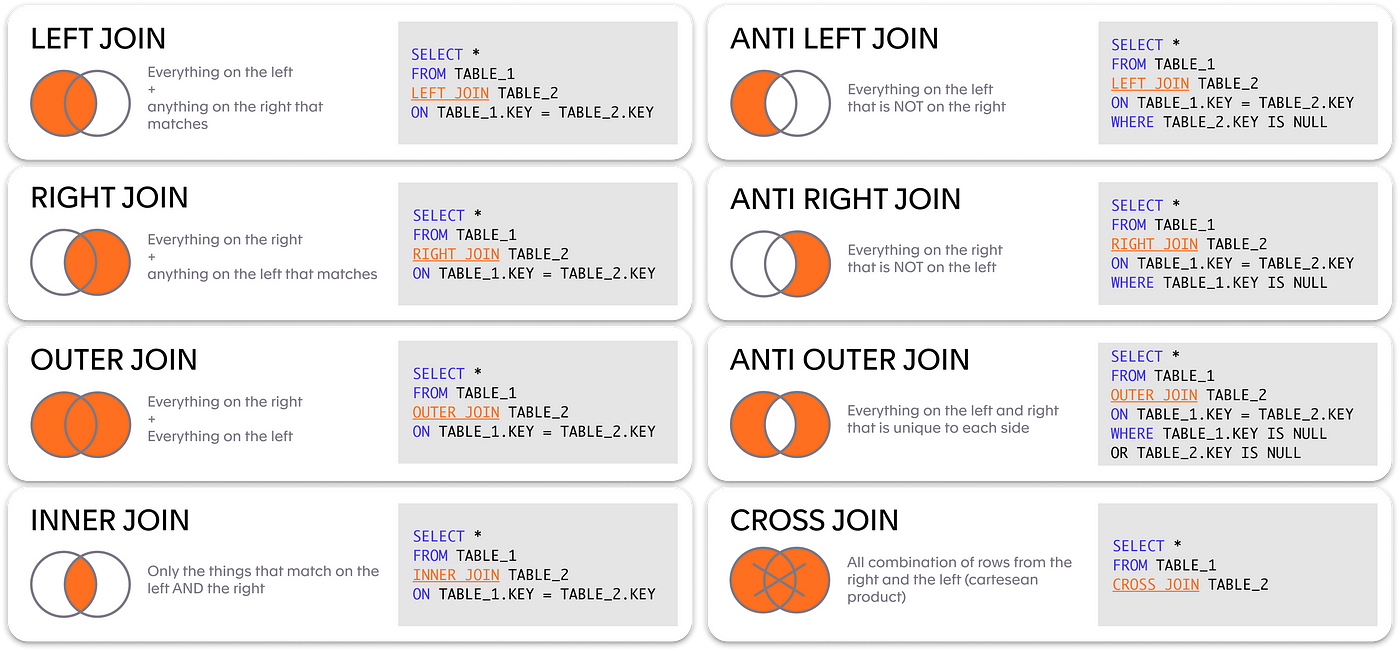

In [ ]:
from IPython.display import Image, display

display(Image('./Date/joins.png'))


In [ ]:
join_df = empleados.join(departamentos,col('id') == col('num_dpto'))
join_df.drop('id').show()

+------+--------+-----------+
|nombre|num_dpto|nombre_dpto|
+------+--------+-----------+
|  Luis|      33|    derecho|
| Katia|      33|    derecho|
|  Raul|      34| matemática|
| Laura|      34| matemática|
|Sandro|      31|     letras|
+------+--------+-----------+



In [ ]:
join_df = empleados.join(departamentos,col('id') == col('num_dpto'), 'inner')
join_df.drop('id').show()

+------+--------+-----------+
|nombre|num_dpto|nombre_dpto|
+------+--------+-----------+
|  Luis|      33|    derecho|
| Katia|      33|    derecho|
|  Raul|      34| matemática|
| Laura|      34| matemática|
|Sandro|      31|     letras|
+------+--------+-----------+



In [ ]:
empleados.join(departamentos, col('id') == col('num_dpto'), 'leftouter').show()

+------+--------+----+-----------+
|nombre|num_dpto|  id|nombre_dpto|
+------+--------+----+-----------+
|  Luis|      33|  33|    derecho|
| Katia|      33|  33|    derecho|
|  Raul|      34|  34| matemática|
| Pedro|       0|null|       null|
| Laura|      34|  34| matemática|
|Sandro|      31|  31|     letras|
+------+--------+----+-----------+



In [ ]:
empleados.join(departamentos, col('id') == col('num_dpto'), 'left_outer').show()

+------+--------+----+-----------+
|nombre|num_dpto|  id|nombre_dpto|
+------+--------+----+-----------+
|  Luis|      33|  33|    derecho|
| Katia|      33|  33|    derecho|
|  Raul|      34|  34| matemática|
| Pedro|       0|null|       null|
| Laura|      34|  34| matemática|
|Sandro|      31|  31|     letras|
+------+--------+----+-----------+



In [ ]:
empleados.join(departamentos, col('id') == col('num_dpto'), 'left').show()

+------+--------+----+-----------+
|nombre|num_dpto|  id|nombre_dpto|
+------+--------+----+-----------+
|  Luis|      33|  33|    derecho|
| Katia|      33|  33|    derecho|
|  Raul|      34|  34| matemática|
| Pedro|       0|null|       null|
| Laura|      34|  34| matemática|
|Sandro|      31|  31|     letras|
+------+--------+----+-----------+



In [ ]:
empleados.join(departamentos, col('id') == col('num_dpto'), 'right').show()

+------+--------+---+-----------+
|nombre|num_dpto| id|nombre_dpto|
+------+--------+---+-----------+
|Sandro|      31| 31|     letras|
| Katia|      33| 33|    derecho|
|  Luis|      33| 33|    derecho|
| Laura|      34| 34| matemática|
|  Raul|      34| 34| matemática|
|  null|    null| 35|informática|
+------+--------+---+-----------+



In [ ]:
empleados.join(departamentos, col('id') == col('num_dpto'), 'full').show()

+------+--------+----+-----------+
|nombre|num_dpto|  id|nombre_dpto|
+------+--------+----+-----------+
| Pedro|       0|null|       null|
|Sandro|      31|  31|     letras|
|  Luis|      33|  33|    derecho|
| Katia|      33|  33|    derecho|
|  Raul|      34|  34| matemática|
| Laura|      34|  34| matemática|
|  null|    null|  35|informática|
+------+--------+----+-----------+



In [ ]:
empleados.join(departamentos, col('id') == col('num_dpto'), 'left_anti').show()

+------+--------+
|nombre|num_dpto|
+------+--------+
| Pedro|       0|
+------+--------+



In [ ]:
departamentos.join(empleados, col('id') == col('num_dpto'), 'left_anti').show()

+---+-----------+
| id|nombre_dpto|
+---+-----------+
| 35|informática|
+---+-----------+



In [ ]:
empleados.join(departamentos, col('id') == col('num_dpto'), 'left_semi').show()

+------+--------+
|nombre|num_dpto|
+------+--------+
|  Luis|      33|
| Katia|      33|
|  Raul|      34|
| Laura|      34|
|Sandro|      31|
+------+--------+



In [ ]:
df = empleados.crossJoin(departamentos)
df.show(truncate = False)
df.count()
#6 empleados x 4 = 24

+------+--------+---+-----------+
|nombre|num_dpto|id |nombre_dpto|
+------+--------+---+-----------+
|Luis  |33      |31 |letras     |
|Luis  |33      |33 |derecho    |
|Luis  |33      |34 |matemática |
|Luis  |33      |35 |informática|
|Katia |33      |31 |letras     |
|Katia |33      |33 |derecho    |
|Katia |33      |34 |matemática |
|Katia |33      |35 |informática|
|Raul  |34      |31 |letras     |
|Raul  |34      |33 |derecho    |
|Raul  |34      |34 |matemática |
|Raul  |34      |35 |informática|
|Pedro |0       |31 |letras     |
|Pedro |0       |33 |derecho    |
|Pedro |0       |34 |matemática |
|Pedro |0       |35 |informática|
|Laura |34      |31 |letras     |
|Laura |34      |33 |derecho    |
|Laura |34      |34 |matemática |
|Laura |34      |35 |informática|
+------+--------+---+-----------+
only showing top 20 rows



24

In [ ]:
df = empleados.join(departamentos, col('id') == col('num_dpto'), 'full')

In [ ]:
df = df.drop('id')
df.show()

+------+--------+-----------+
|nombre|num_dpto|nombre_dpto|
+------+--------+-----------+
| Pedro|       0|       null|
|Sandro|      31|     letras|
|  Luis|      33|    derecho|
| Katia|      33|    derecho|
|  Raul|      34| matemática|
| Laura|      34| matemática|
|  null|    null|informática|
+------+--------+-----------+



In [ ]:
##Shufle Hash Join - Ambos conjuntos de datos son grandes
##Broadcast Hash Join - Uno de los conjuntos de datos es pequeño

In [ ]:
from pyspark.sql.functions import broadcast

In [ ]:
empleados.join(broadcast(departamentos), col('num_dpto') == col('id')).show()

+------+--------+---+-----------+
|nombre|num_dpto| id|nombre_dpto|
+------+--------+---+-----------+
|  Luis|      33| 33|    derecho|
| Katia|      33| 33|    derecho|
|  Raul|      34| 34| matemática|
| Laura|      34| 34| matemática|
|Sandro|      31| 31|     letras|
+------+--------+---+-----------+



In [ ]:
empleados.join(broadcast(departamentos), col('num_dpto') == col('id')).explain()

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- BroadcastHashJoin [num_dpto#4268L], [id#4271L], Inner, BuildRight, false
   :- Filter isnotnull(num_dpto#4268L)
   :  +- FileScan parquet [nombre#4267,num_dpto#4268L] Batched: true, DataFilters: [isnotnull(num_dpto#4268L)], Format: Parquet, Location: InMemoryFileIndex(1 paths)[file:/content/empleados.parquet], PartitionFilters: [], PushedFilters: [IsNotNull(num_dpto)], ReadSchema: struct<nombre:string,num_dpto:bigint>
   +- BroadcastExchange HashedRelationBroadcastMode(List(input[0, bigint, false]),false), [plan_id=2089]
      +- Filter isnotnull(id#4271L)
         +- FileScan parquet [id#4271L,nombre_dpto#4272] Batched: true, DataFilters: [isnotnull(id#4271L)], Format: Parquet, Location: InMemoryFileIndex(1 paths)[file:/content/departamentos.parquet], PartitionFilters: [], PushedFilters: [IsNotNull(id)], ReadSchema: struct<id:bigint,nombre_dpto:string>




##Sección 8: Ejerjicios

In [ ]:
appearances = spark.read.csv('./Date/appearances.csv', header=True)
clubs = spark.read.csv('./Date/clubs.csv', header=True)
competitions = spark.read.csv('./Date/competitions.csv', header=True)
games = spark.read.csv('./Date/games.csv', header=True)
leagues =  spark.read.csv('./Date/leagues.csv', header=True)
players = spark.read.csv('./Date/players.csv', header=True)

In [ ]:
appearances.show()
clubs.show()
competitions.show()
games.show()
leagues.show()
players.show()

+---------+-------+-------------+--------------+--------------+-----+-------+--------------+------------+---------+
|player_id|game_id|appearance_id|competition_id|player_club_id|goals|assists|minutes_played|yellow_cards|red_cards|
+---------+-------+-------------+--------------+--------------+-----+-------+--------------+------------+---------+
|    52453|2483937|2483937_52453|           RU1|         28095|    0|      0|            90|           0|        0|
|    67064|2479929|2479929_67064|           RU1|         28095|    0|      0|            90|           0|        0|
|    67064|2483937|2483937_67064|           RU1|         28095|    0|      0|            90|           0|        0|
|    67064|2484582|2484582_67064|           RU1|         28095|    0|      0|            55|           0|        0|
|    67064|2485965|2485965_67064|           RU1|         28095|    0|      0|            90|           0|        0|
|    67064|2487345|2487345_67064|           RU1|         28095|    0|   

In [ ]:
#players = players.filter(players['country_of_birth'].isNotNull())
players.groupBy('country_of_birth').agg(
    countDistinct('player_id').alias('jugadores')
).filter(col('country_of_birth').isNotNull()).orderBy(desc('jugadores')).show()

+-----------------+---------+
| country_of_birth|jugadores|
+-----------------+---------+
|           France|     1694|
|            Spain|     1388|
|            Italy|     1312|
|          England|     1273|
|          Germany|     1154|
|      Netherlands|     1137|
|           Brazil|     1087|
|           Turkey|     1085|
|         Portugal|      803|
|           Greece|      725|
|            UdSSR|      721|
|          Ukraine|      671|
|           Russia|      634|
|         Scotland|      594|
|          Belgium|      580|
|          Denmark|      444|
|        Argentina|      432|
|Jugoslawien (SFR)|      354|
|           Sweden|      186|
|          Nigeria|      182|
+-----------------+---------+
only showing top 20 rows



In [ ]:
 appearances.groupBy('player_id').agg(
    sum('red_cards').alias('total_red_cards')
).orderBy(desc('total_red_cards')).show()

+---------+---------------+
|player_id|total_red_cards|
+---------+---------------+
|    45146|            5.0|
|   111455|            5.0|
|     4811|            5.0|
|   131821|            5.0|
|   177843|            5.0|
|   111508|            4.0|
|   187587|            4.0|
|    60317|            4.0|
|    44686|            4.0|
|   131694|            4.0|
|    46741|            4.0|
|    65318|            4.0|
|    85289|            4.0|
|    94807|            4.0|
|    63186|            4.0|
|   241229|            4.0|
|    30767|            4.0|
|   255901|            4.0|
|    67815|            4.0|
|   439022|            4.0|
+---------+---------------+
only showing top 20 rows



In [ ]:
leagues.show()

+---------+--------------------+-------------+
|league_id|                name|confederation|
+---------+--------------------+-------------+
|       L1|          bundesliga|       europa|
|      NL1|          eredivisie|       europa|
|      BE1|  jupiler-pro-league|       europa|
|      ES1|              laliga|       europa|
|      PO1|            liga-nos|       europa|
|      FR1|             ligue-1|       europa|
|      GB1|      premier-league|       europa|
|      RU1|        premier-liga|       europa|
|     UKR1|        premier-liga|       europa|
|      SC1|scottish-premiership|       europa|
|      IT1|             serie-a|       europa|
|      GR1|      super-league-1|       europa|
|      TR1|           super-lig|       europa|
|      DK1|         superligaen|       europa|
+---------+--------------------+-------------+



In [ ]:
games.show()

+-------+----------------+------+-------------+----------+------------+------------+---------------+---------------+------------------+------------------+--------------------+----------+--------------------+--------------------+
|game_id|competition_code|season|        round|      date|home_club_id|away_club_id|home_club_goals|away_club_goals|home_club_position|away_club_position|             stadium|attendance|             referee|                 url|
+-------+----------------+------+-------------+----------+------------+------------+---------------+---------------+------------------+------------------+--------------------+----------+--------------------+--------------------+
|2457642|            NLSC|  2014|        Final|2014-08-03|        1269|         610|              1|              0|              null|              null| Johan Cruijff ArenA|     42000|      Danny Makkelie|https://www.trans...|
|2639088|            BESC|  2013|        Final|2014-07-20|          58|         498|

In [ ]:
leaguegamejoin = games.join(leagues, col('league_id') == col('competition_code'), 'inner')
leaguegamejoin.show()

+-------+----------------+------+------------+----------+------------+------------+---------------+---------------+------------------+------------------+--------------------+----------+--------------------+--------------------+---------+--------------+-------------+
|game_id|competition_code|season|       round|      date|home_club_id|away_club_id|home_club_goals|away_club_goals|home_club_position|away_club_position|             stadium|attendance|             referee|                 url|league_id|          name|confederation|
+-------+----------------+------+------------+----------+------------+------------+---------------+---------------+------------------+------------------+--------------------+----------+--------------------+--------------------+---------+--------------+-------------+
|2459774|             NL1|  2014|21. Matchday|2015-02-05|         610|        1090|              0|              1|                 2|                 5| Johan Cruijff ArenA|     47724|      Pol van 

In [ ]:
from pyspark.sql.functions import when
leaguegamejoin = leaguegamejoin.withColumn(
    'name',
    when(col('name') == 'premier-liga',  'premier-league').otherwise(col('name'))
)
leaguegamejoin.select('name').distinct().show()

+--------------------+
|                name|
+--------------------+
|              laliga|
|      super-league-1|
|  jupiler-pro-league|
|             ligue-1|
|            liga-nos|
|           super-lig|
|         superligaen|
|          eredivisie|
|      premier-league|
|          bundesliga|
|scottish-premiership|
|             serie-a|
+--------------------+



In [ ]:
leaguegamejoin.groupBy('name').agg(
    count('*').alias('total_juegos')
).where(col('name') == 'premier-league').show()

#premier-league

+--------------+------------+
|          name|total_juegos|
+--------------+------------+
|premier-league|        5893|
+--------------+------------+



In [ ]:
#attendance
leaguegamejoin.groupBy('name').agg(
    count('*').alias('n_juegos'),
    avg('attendance').alias('avg_attendance'),
    sum('attendance').alias('sum_attendance')
).orderBy(desc('sum_attendance')).show(3)

+--------------+--------+------------------+--------------+
|          name|n_juegos|    avg_attendance|sum_attendance|
+--------------+--------+------------------+--------------+
|premier-league|    5893|21467.155119908643|  1.12788433E8|
|    bundesliga|    2268| 40977.16316894019|   7.8102473E7|
|        laliga|    2814| 27154.24201898188|   6.2943533E7|
+--------------+--------+------------------+--------------+
only showing top 3 rows



#Sección 9

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [ ]:
data = spark.read.parquet('./Date/convertir')
data.show()

+----------+--------------------+----------+----------------+
|      date|           timestamp|  date_str|          ts_str|
+----------+--------------------+----------+----------------+
|2021-01-01|2021-01-01 20:10:...|01-01-2021|18-08-2021 46:58|
+----------+--------------------+----------+----------------+



In [ ]:
data.printSchema()

root
 |-- date: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- date_str: string (nullable = true)
 |-- ts_str: string (nullable = true)



In [ ]:
from pyspark.sql.functions import col, to_date, to_timestamp
data = data.select(
    to_date(col('date')).alias('date1'),
    to_timestamp(col('timestamp')).alias('timestamp1'),
    to_date(col('date_str'), 'dd-MM-yyyy').alias('date_str1'),
    to_timestamp(col('ts_str'), 'dd-MM-yyyy mm:ss').alias('ts_str1')
)
data.show(truncate=False)

+----------+-----------------------+----------+-------------------+
|date1     |timestamp1             |date_str1 |ts_str1            |
+----------+-----------------------+----------+-------------------+
|2021-01-01|2021-01-01 20:10:50.723|2021-01-01|2021-08-18 00:46:58|
+----------+-----------------------+----------+-------------------+



In [ ]:
from pyspark.sql.functions import date_format

data1 = data
data1.show()

+----------+--------------------+----------+-------------------+
|     date1|          timestamp1| date_str1|            ts_str1|
+----------+--------------------+----------+-------------------+
|2021-01-01|2021-01-01 20:10:...|2021-01-01|2021-08-18 00:46:58|
+----------+--------------------+----------+-------------------+



In [ ]:
data1.select(
    date_format(col('date1'), 'dd-MM-yyyy')
).show()

+------------------------------+
|date_format(date1, dd-MM-yyyy)|
+------------------------------+
|                    01-01-2021|
+------------------------------+



In [ ]:
df = spark.read.parquet('./Date/calculo.parquet')

In [ ]:
df.show()

+------+-------------+------------+-------------------+
|nombre|fecha_ingreso|fecha_salida|       baja_sistema|
+------+-------------+------------+-------------------+
|  Jose|   2021-01-01|  2021-11-14|2021-10-14 15:35:59|
|Mayara|   2021-02-06|  2021-11-25|2021-11-25 10:35:55|
+------+-------------+------------+-------------------+



In [ ]:
from pyspark.sql.functions import datediff, months_between, last_day


In [ ]:
df.select(
    datediff(col('fecha_ingreso'), col('fecha_salida')),
    months_between(col('fecha_ingreso'), col('fecha_salida')),
    last_day(col('fecha_ingreso'))
).show()

+-------------------------------------+-------------------------------------------------+-----------------------+
|datediff(fecha_ingreso, fecha_salida)|months_between(fecha_ingreso, fecha_salida, true)|last_day(fecha_ingreso)|
+-------------------------------------+-------------------------------------------------+-----------------------+
|                                 -317|                                     -10.41935484|             2021-01-31|
|                                 -292|                                      -9.61290323|             2021-02-28|
+-------------------------------------+-------------------------------------------------+-----------------------+



In [ ]:
#date_add para adicionar dias
#date_sub para subtrair dias
#year, month, dayofmonth, dayofyear, hour, minute, second

#String - Quitar espacios ltrim, rtrim, trim
#       - Adicionar caracterews lpad, rpad

data = spark.read.parquet('./Date/Parquet')
data.show(truncate=False)


+-----+--------------------------------------------+
|dia  |tareas                                      |
+-----+--------------------------------------------+
|lunes|[hacer la tarea, buscar agua, lavar el auto]|
+-----+--------------------------------------------+



In [ ]:
data.printSchema()

root
 |-- dia: string (nullable = true)
 |-- tareas: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [ ]:
from pyspark.sql.functions import col, size, sort_array, array_contains

In [ ]:
data.select(
    size(col('tareas')).alias('tamano'),
    sort_array('tareas'),
    array_contains(col('tareas'), 'buscar agua')
).show(truncate=False)

+------+--------------------------------------------+-----------------------------------+
|tamano|sort_array(tareas, true)                    |array_contains(tareas, buscar agua)|
+------+--------------------------------------------+-----------------------------------+
|3     |[buscar agua, hacer la tarea, lavar el auto]|true                               |
+------+--------------------------------------------+-----------------------------------+



In [ ]:
from pyspark.sql.functions import explode
data.select(
    col('dia'),
    explode('tareas')
).show()

+-----+--------------+
|  dia|           col|
+-----+--------------+
|lunes|hacer la tarea|
|lunes|   buscar agua|
|lunes| lavar el auto|
+-----+--------------+



In [ ]:
data1 = spark.read.parquet('./Date/JSON')

In [ ]:
data1.show(truncate=False)

+---------------------------------------------------------------------------+
|tareas_str                                                                 |
+---------------------------------------------------------------------------+
|{"dia": "lunes","tareas": ["hacer la tarea","buscar agua","lavar el auto"]}|
+---------------------------------------------------------------------------+



In [ ]:
data1.printSchema()

root
 |-- tareas_str: string (nullable = true)



In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, ArrayType

In [ ]:
schema_json = StructType(
    [
    StructField('dia', StringType(), True),
    StructField('tareas', ArrayType(StringType()), True)
    ]
)

In [ ]:
from pyspark.sql.functions import from_json, to_json

json_df = data1.select(
    from_json(col('tareas_str'), schema_json).alias('por_hacer')
)
json_df.show(truncate=False)
json_df.printSchema()

+-----------------------------------------------------+
|por_hacer                                            |
+-----------------------------------------------------+
|{lunes, [hacer la tarea, buscar agua, lavar el auto]}|
+-----------------------------------------------------+

root
 |-- por_hacer: struct (nullable = true)
 |    |-- dia: string (nullable = true)
 |    |-- tareas: array (nullable = true)
 |    |    |-- element: string (containsNull = true)



In [ ]:
json_df.select(
    col('por_hacer').getItem('dia'),
    col('por_hacer').getItem('tareas'),
    col('por_hacer').getItem('tareas').getItem(0).alias('primera tarea')
).show(truncate=False)

+-------------+--------------------------------------------+--------------+
|por_hacer.dia|por_hacer.tareas                            |primera tarea |
+-------------+--------------------------------------------+--------------+
|lunes        |[hacer la tarea, buscar agua, lavar el auto]|hacer la tarea|
+-------------+--------------------------------------------+--------------+



In [ ]:
data = spark.read.parquet('./Date/Parquet1')
data.show()

+------+----+
|nombre|pago|
+------+----+
|  Jose|   1|
| Julia|   2|
| Katia|   1|
|  null|   3|
|  Raul|   3|
+------+----+



In [ ]:
from pyspark.sql.functions import col, when, lit, coalesce

data.select(
    col('nombre'),
 #   col('pago'),
    when(col('pago')==1, 'Pago').when(col('pago') == 2, 'Sin pagar').otherwise('Sin iniciar').alias('pago')
).show()

+------+-----------+
|nombre|       pago|
+------+-----------+
|  Jose|       Pago|
| Julia|  Sin pagar|
| Katia|       Pago|
|  null|Sin iniciar|
|  Raul|Sin iniciar|
+------+-----------+



In [ ]:
data.select(
    coalesce(col('nombre'), lit('sin nombre')).alias('nombre')
).show()

+----------+
|    nombre|
+----------+
|      Jose|
|     Julia|
|     Katia|
|sin nombre|
|      Raul|
+----------+



In [ ]:
def f_cubo(n):
  return n*n*n

In [ ]:
from pyspark.sql.types import LongType

In [ ]:
spark.udf.register('cubo', f_cubo, LongType())

<function __main__.f_cubo(n)>

In [ ]:
spark.range(1,10).createOrReplaceTempView('df_temp')

In [ ]:
spark.sql("SELECT id, cubo(id) AS Cubo FROM df_temp").show()

+---+----+
| id|Cubo|
+---+----+
|  1|   1|
|  2|   8|
|  3|  27|
|  4|  64|
|  5| 125|
|  6| 216|
|  7| 343|
|  8| 512|
|  9| 729|
+---+----+



In [ ]:
def bienvenida(nombre):
  return ('Hola {}'.format(nombre))

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

In [ ]:
bienvenida_udf = udf(lambda x: bienvenida(x), StringType())

In [ ]:
df_nombre = spark.createDataFrame([('Jose',), ('Julia', )], ['nombre'])
df_nombre.show()

+------+
|nombre|
+------+
|  Jose|
| Julia|
+------+



In [ ]:
df_nombre.select(
    col('nombre'),
    bienvenida_udf(col('nombre')).alias('bienvenida')
).show()

+------+----------+
|nombre|bienvenida|
+------+----------+
|  Jose| Hola Jose|
| Julia|Hola Julia|
+------+----------+



In [ ]:
import pandas as pd
from pyspark.sql.functions import pandas_udf

In [ ]:
def cubo_pandas(a: pd.Series) -> pd.Series:
  return a*a*a

In [ ]:
cubo_udf = pandas_udf(cubo_pandas, returnType=LongType())

In [ ]:
x = pd.Series([1,2,3])

In [ ]:
print(cubo_pandas(x))

0     1
1     8
2    27
dtype: int64


In [ ]:
df = spark.read.parquet('./Date/funciones_ventana.parquet')

In [ ]:
df.show()

+-------+----+------------+----------+
| nombre|edad|departamento|evaluacion|
+-------+----+------------+----------+
| Lazaro|  45|      letras|        98|
|   Raul|  24|  matemática|        76|
|  Maria|  34|  matemática|        27|
|   Jose|  30|     química|        78|
| Susana|  51|     química|        98|
|   Juan|  44|      letras|        89|
|  Julia|  55|      letras|        92|
|  Kadir|  38|arquitectura|        39|
| Lilian|  23|arquitectura|        94|
|   Rosa|  26|      letras|        91|
|   Aian|  50|  matemática|        73|
|Yaneisy|  29|      letras|        89|
|Enrique|  40|     química|        92|
|    Jon|  25|arquitectura|        78|
|  Luisa|  39|arquitectura|        94|
+-------+----+------------+----------+



In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import desc, row_number, rank, dense_rank

In [ ]:
WindowSpec = Window.partitionBy('departamento').orderBy(desc('evaluacion'))

df.withColumn('row_number', row_number().over(WindowSpec)).filter(col('row_number').isin(1,2)).show()

+-------+----+------------+----------+----------+
| nombre|edad|departamento|evaluacion|row_number|
+-------+----+------------+----------+----------+
| Lilian|  23|arquitectura|        94|         1|
|  Luisa|  39|arquitectura|        94|         2|
| Lazaro|  45|      letras|        98|         1|
|  Julia|  55|      letras|        92|         2|
|   Raul|  24|  matemática|        76|         1|
|   Aian|  50|  matemática|        73|         2|
| Susana|  51|     química|        98|         1|
|Enrique|  40|     química|        92|         2|
+-------+----+------------+----------+----------+



In [ ]:
df.withColumn('rank', rank().over(WindowSpec)).show()

+-------+----+------------+----------+----+
| nombre|edad|departamento|evaluacion|rank|
+-------+----+------------+----------+----+
| Lilian|  23|arquitectura|        94|   1|
|  Luisa|  39|arquitectura|        94|   1|
|    Jon|  25|arquitectura|        78|   3|
|  Kadir|  38|arquitectura|        39|   4|
| Lazaro|  45|      letras|        98|   1|
|  Julia|  55|      letras|        92|   2|
|   Rosa|  26|      letras|        91|   3|
|   Juan|  44|      letras|        89|   4|
|Yaneisy|  29|      letras|        89|   4|
|   Raul|  24|  matemática|        76|   1|
|   Aian|  50|  matemática|        73|   2|
|  Maria|  34|  matemática|        27|   3|
| Susana|  51|     química|        98|   1|
|Enrique|  40|     química|        92|   2|
|   Jose|  30|     química|        78|   3|
+-------+----+------------+----------+----+



In [ ]:
df.withColumn('dense_rank', dense_rank().over(WindowSpec)).show()

+-------+----+------------+----------+----------+
| nombre|edad|departamento|evaluacion|dense_rank|
+-------+----+------------+----------+----------+
| Lilian|  23|arquitectura|        94|         1|
|  Luisa|  39|arquitectura|        94|         1|
|    Jon|  25|arquitectura|        78|         2|
|  Kadir|  38|arquitectura|        39|         3|
| Lazaro|  45|      letras|        98|         1|
|  Julia|  55|      letras|        92|         2|
|   Rosa|  26|      letras|        91|         3|
|   Juan|  44|      letras|        89|         4|
|Yaneisy|  29|      letras|        89|         4|
|   Raul|  24|  matemática|        76|         1|
|   Aian|  50|  matemática|        73|         2|
|  Maria|  34|  matemática|        27|         3|
| Susana|  51|     química|        98|         1|
|Enrique|  40|     química|        92|         2|
|   Jose|  30|     química|        78|         3|
+-------+----+------------+----------+----------+



In [ ]:
windowSpecAgg = Window.partitionBy('departamento')

In [ ]:
from pyspark.sql.functions import min,max,avg

(df.withColumn('min', min(col('evaluacion')).over(windowSpecAgg))
.withColumn('max', max(col('evaluacion')).over(windowSpecAgg))
.withColumn('avg', avg(col('evaluacion')).over(windowSpecAgg))
.withColumn('row_number', row_number().over(WindowSpec))
 ).show()

+-------+----+------------+----------+---+---+------------------+----------+
| nombre|edad|departamento|evaluacion|min|max|               avg|row_number|
+-------+----+------------+----------+---+---+------------------+----------+
| Lilian|  23|arquitectura|        94| 39| 94|             76.25|         1|
|  Luisa|  39|arquitectura|        94| 39| 94|             76.25|         2|
|    Jon|  25|arquitectura|        78| 39| 94|             76.25|         3|
|  Kadir|  38|arquitectura|        39| 39| 94|             76.25|         4|
| Lazaro|  45|      letras|        98| 89| 98|              91.8|         1|
|  Julia|  55|      letras|        92| 89| 98|              91.8|         2|
|   Rosa|  26|      letras|        91| 89| 98|              91.8|         3|
|   Juan|  44|      letras|        89| 89| 98|              91.8|         4|
|Yaneisy|  29|      letras|        89| 89| 98|              91.8|         5|
|   Raul|  24|  matemática|        76| 27| 76|58.666666666666664|         1|

##Ejercicios Sección 9: Funciones en Spark SQL

In [46]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [47]:
movies = spark.read.option('sep', '|').option('inferSchema' , 'true').csv('./data/movies.csv', header=True)
movie_ratings = spark.read.option('sep', '|').option('inferSchema' , 'true').csv('./data/movie_ratings.csv', header=True)

In [48]:
movies.show(truncate=False)

+-----------------+---------------------------+----+
|actor            |pelicula                   |año |
+-----------------+---------------------------+----+
|McClure, Marc (I)|Freaky Friday              |2003|
|McClure, Marc (I)|Coach Carter               |2005|
|McClure, Marc (I)|Superman II                |1980|
|McClure, Marc (I)|Apollo 13                  |1995|
|McClure, Marc (I)|Superman                   |1978|
|McClure, Marc (I)|Back to the Future         |1985|
|McClure, Marc (I)|Back to the Future Part III|1990|
|Cooper, Chris (I)|Me, Myself & Irene         |2000|
|Cooper, Chris (I)|October Sky                |1999|
|Cooper, Chris (I)|Capote                     |2005|
|Cooper, Chris (I)|The Bourne Supremacy       |2004|
|Cooper, Chris (I)|The Patriot                |2000|
|Cooper, Chris (I)|The Town                   |2010|
|Cooper, Chris (I)|Seabiscuit                 |2003|
|Cooper, Chris (I)|A Time to Kill             |1996|
|Cooper, Chris (I)|Where the Wild Things Are  

Cada línea del archivo movies.csv representa a un actor que actuó en una película. Si una película tiene diez actores, habrá diez filas para esa película en particular.



In [49]:
movie_ratings.show(3, truncate=False)

+----------+--------------------------+----+
|valoracion|pelicula                  |año |
+----------+--------------------------+----+
|1.6339    |'Crocodile' Dundee II     |1988|
|7.6177    |10                        |1979|
|1.2864    |10 Things I Hate About You|1999|
+----------+--------------------------+----+
only showing top 3 rows



In [50]:
movies.printSchema()

root
 |-- actor: string (nullable = true)
 |-- pelicula: string (nullable = true)
 |-- año: integer (nullable = true)



In [73]:
from pyspark.sql.functions import col, count, desc,when, floor, max, avg,first
movies.groupBy('actor').agg(
    count('*').alias('count')
).orderBy(desc('count')).show()

+-------------------+-----+
|              actor|count|
+-------------------+-----+
|   Tatasciore, Fred|   38|
|      Welker, Frank|   38|
| Jackson, Samuel L.|   32|
|      Harnell, Jess|   31|
|        Damon, Matt|   27|
|      Willis, Bruce|   27|
|  Cummings, Jim (I)|   26|
|         Hanks, Tom|   25|
|   Lynn, Sherry (I)|   25|
|    McGowan, Mickie|   25|
|    Bergen, Bob (I)|   25|
|      Proctor, Phil|   24|
|   Wilson, Owen (I)|   23|
|        Cruise, Tom|   23|
|         Pitt, Brad|   23|
|Freeman, Morgan (I)|   22|
|Williams, Robin (I)|   22|
|       Depp, Johnny|   22|
|     Morrison, Rana|   22|
|      Diaz, Cameron|   21|
+-------------------+-----+
only showing top 20 rows



In [74]:
movies.show()

+-----------------+--------------------+----+-----+
|            actor|            pelicula| año|siglo|
+-----------------+--------------------+----+-----+
|McClure, Marc (I)|       Freaky Friday|2003|   21|
|McClure, Marc (I)|        Coach Carter|2005|   21|
|McClure, Marc (I)|         Superman II|1980|   20|
|McClure, Marc (I)|           Apollo 13|1995|   20|
|McClure, Marc (I)|            Superman|1978|   20|
|McClure, Marc (I)|  Back to the Future|1985|   20|
|McClure, Marc (I)|Back to the Futur...|1990|   20|
|Cooper, Chris (I)|  Me, Myself & Irene|2000|   20|
|Cooper, Chris (I)|         October Sky|1999|   20|
|Cooper, Chris (I)|              Capote|2005|   21|
|Cooper, Chris (I)|The Bourne Supremacy|2004|   21|
|Cooper, Chris (I)|         The Patriot|2000|   20|
|Cooper, Chris (I)|            The Town|2010|   21|
|Cooper, Chris (I)|          Seabiscuit|2003|   21|
|Cooper, Chris (I)|      A Time to Kill|1996|   20|
|Cooper, Chris (I)|Where the Wild Th...|2009|   21|
|Cooper, Chr

In [75]:
movies.printSchema()

root
 |-- actor: string (nullable = true)
 |-- pelicula: string (nullable = true)
 |-- año: integer (nullable = true)
 |-- siglo: long (nullable = true)



In [76]:
movies = movies.withColumn(
    'siglo',
    when(col('año') % 100 == 0, floor(col('año') / 100))
    .otherwise(floor((col('año') / 100)) + 1)
)

movies.show()
movies.printSchema()

+-----------------+--------------------+----+-----+
|            actor|            pelicula| año|siglo|
+-----------------+--------------------+----+-----+
|McClure, Marc (I)|       Freaky Friday|2003|   21|
|McClure, Marc (I)|        Coach Carter|2005|   21|
|McClure, Marc (I)|         Superman II|1980|   20|
|McClure, Marc (I)|           Apollo 13|1995|   20|
|McClure, Marc (I)|            Superman|1978|   20|
|McClure, Marc (I)|  Back to the Future|1985|   20|
|McClure, Marc (I)|Back to the Futur...|1990|   20|
|Cooper, Chris (I)|  Me, Myself & Irene|2000|   20|
|Cooper, Chris (I)|         October Sky|1999|   20|
|Cooper, Chris (I)|              Capote|2005|   21|
|Cooper, Chris (I)|The Bourne Supremacy|2004|   21|
|Cooper, Chris (I)|         The Patriot|2000|   20|
|Cooper, Chris (I)|            The Town|2010|   21|
|Cooper, Chris (I)|          Seabiscuit|2003|   21|
|Cooper, Chris (I)|      A Time to Kill|1996|   20|
|Cooper, Chris (I)|Where the Wild Th...|2009|   21|
|Cooper, Chr

In [77]:
movies.groupBy('año').agg(
    max(col('siglo')).alias('siglo1'),
    count('pelicula').alias('num_peliculas')
).orderBy(desc('num_peliculas')).show()

+----+------+-------------+
| año|siglo1|num_peliculas|
+----+------+-------------+
|2006|    21|         2078|
|2004|    21|         2005|
|2007|    21|         1986|
|2005|    21|         1960|
|2011|    21|         1926|
|2008|    21|         1892|
|2009|    21|         1890|
|2010|    21|         1843|
|2002|    21|         1834|
|2001|    21|         1687|
|2003|    21|         1652|
|2000|    20|         1639|
|1997|    20|         1584|
|1999|    20|         1401|
|1998|    20|         1372|
|1996|    20|          916|
|2012|    21|          601|
|1995|    20|          498|
|1994|    20|          358|
|1992|    20|          304|
+----+------+-------------+
only showing top 20 rows



In [78]:
movie_ratings.show()

+----------+--------------------+----+
|valoracion|            pelicula| año|
+----------+--------------------+----+
|    1.6339|'Crocodile' Dunde...|1988|
|    7.6177|                  10|1979|
|    1.2864|10 Things I Hate ...|1999|
|    0.3243|           10,000 BC|2008|
|    0.3376|      101 Dalmatians|1996|
|    0.5218|      102 Dalmatians|2000|
|   12.8205|                1066|2012|
|    0.6829|                  12|2007|
|    7.4061|           12 Rounds|2009|
|    2.3677|           127 Hours|2010|
|    1.3585|      13 Going on 30|2004|
|    8.4034|     13 game sayawng|2006|
|      0.59|                1408|2007|
|    4.4292|          15 Minutes|2001|
|    2.2118|           16 Blocks|2006|
|    1.0491|            17 Again|2009|
|    3.9265|                1941|1979|
|   10.4757|2 Days in the Valley|1996|
|       0.4|    2 Fast 2 Furious|2003|
|   11.1111|              2 Guns|2013|
+----------+--------------------+----+
only showing top 20 rows



In [81]:
movie_ratings.groupBy('año').agg(
    max('valoracion'),
    first(col('pelicula'))
).orderBy('año').show()

+----+---------------+--------------------+
| año|max(valoracion)|     first(pelicula)|
+----+---------------+--------------------+
|1937|         2.2207|Snow White and th...|
|1939|         7.9215|  Gone with the Wind|
|1940|         7.8557|            Fantasia|
|1942|         1.5053|               Bambi|
|1946|          7.602|   Song of the South|
|1950|         9.4226|          Cinderella|
|1953|         5.4756|           Peter Pan|
|1954|        10.7625|         Rear Window|
|1955|         5.1258|  Lady and the Tramp|
|1956|        14.0607|Around the World ...|
|1959|         6.3919|             Ben-Hur|
|1960|        10.6375|              Psycho|
|1961|         0.6726|One Hundred and O...|
|1962|        12.8866|              Dr. No|
|1963|          6.626|           Cleopatra|
|1964|          7.587|          Goldfinger|
|1965|         4.9304|      Doctor Zhivago|
|1966|        11.1111|Who's Afraid of V...|
|1967|         13.388|    Bonnie and Clyde|
|1968|        13.4383|2001: A Sp

In [4]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Catalyst').getOrCreate()

In [5]:
data = spark.read.parquet('./vuelos.parquet')

In [6]:
from pyspark.sql.functions import col

In [7]:
nuevo_df = (data.filter(col('Month').isin(6,7,8))
            .withColumn('dis_tiempo_aire', col ('Distance') / col('AIR_TIME'))
            ).select(
                col('AIRLINE'),
                col('dis_tiempo_aire')
            ).where(col('AIRLINE').isin('AA', 'DL', 'AS'))

In [8]:
nuevo_df.explain(True)

== Parsed Logical Plan ==
'Filter 'AIRLINE IN (AA,DL,AS)
+- Project [AIRLINE#11, dis_tiempo_aire#70]
   +- Project [YEAR#7, MONTH#8, DAY#9, DAY_OF_WEEK#10, AIRLINE#11, FLIGHT_NUMBER#12, TAIL_NUMBER#13, ORIGIN_AIRPORT#14, DESTINATION_AIRPORT#15, SCHEDULED_DEPARTURE#16, DEPARTURE_TIME#17, DEPARTURE_DELAY#18, TAXI_OUT#19, WHEELS_OFF#20, SCHEDULED_TIME#21, ELAPSED_TIME#22, AIR_TIME#23, DISTANCE#24, WHEELS_ON#25, TAXI_IN#26, SCHEDULED_ARRIVAL#27, ARRIVAL_TIME#28, ARRIVAL_DELAY#29, DIVERTED#30, ... 8 more fields]
      +- Filter Month#8 IN (6,7,8)
         +- Relation [YEAR#7,MONTH#8,DAY#9,DAY_OF_WEEK#10,AIRLINE#11,FLIGHT_NUMBER#12,TAIL_NUMBER#13,ORIGIN_AIRPORT#14,DESTINATION_AIRPORT#15,SCHEDULED_DEPARTURE#16,DEPARTURE_TIME#17,DEPARTURE_DELAY#18,TAXI_OUT#19,WHEELS_OFF#20,SCHEDULED_TIME#21,ELAPSED_TIME#22,AIR_TIME#23,DISTANCE#24,WHEELS_ON#25,TAXI_IN#26,SCHEDULED_ARRIVAL#27,ARRIVAL_TIME#28,ARRIVAL_DELAY#29,DIVERTED#30,... 7 more fields] parquet

== Analyzed Logical Plan ==
AIRLINE: string, dis